In [2]:
import os, sys
import pandas as pd
import numpy as np
from calendar import month_name

from pathlib import Path

notebook_dir = os.getcwd()
data_dir = str(Path(notebook_dir).parent / 'example_data')

## Read data into Dataframes

Dataframes and Series are the core objects in Pandas. Think of a Dataframe as like an Excel spreadsheet, except we can do much more with a Dataframe and it is much faster than Excel! 

We will start by loading a Dataframe from CSV

NOTE: Here we are loading data that is separated by two blank spaces, so we have to specify the 'sep' parameter (as the default is comma separated). There are two alternatives to load this; use `sep='  '`, or `sep='\s+'`. The second one will deal with arbitrary numbers of blank spaces, so is more flexible. This is equivalent to using `delim_whitespace=True` in the input arguments

In [38]:
column_names = ['YEAR'] + [month_name[n] for n in range(1, 13)]

df = pd.read_csv(os.path.join(data_dir, 'el_nino_3.4.csv'), 
                 header=None, 
                 sep='\s+', names=column_names)

In [ ]:
# Note that we can also deal with comments etc at the beginning of the file

# first lets see what Pandas does by default
df_with_header_bad = pd.read_csv(os.path.join(data_dir, 'el_nino_3.4_with_comments.csv'), 
                 header=None, 
                 sep='\s+', names=column_names)

df_with_header_bad.head()

In [ ]:
# Get around this using `skiprows`
df_with_header_good = pd.read_csv(os.path.join(data_dir, 'el_nino_3.4_with_comments.csv'), 
                 header=None, 
                 sep='\s+', names=column_names, skiprows=2)

df_with_header_good.head()

In [ ]:
# Lots of other options, look at the read_csv documentation for more!

## Describing the data

In [61]:
# .head() is a useful method to have a quick look at the data
df.head(n=10)

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,1979,-0.13,-0.22,-0.02,0.02,-0.25,-0.29,-0.47,-0.10,0.28,0.11,0.29,0.52
1,1980,0.54,0.22,0.03,-0.07,0.08,0.21,-0.06,-0.38,-0.28,-0.26,-0.10,0.05
2,1981,-0.36,-0.64,-0.64,-0.53,-0.57,-0.46,-0.64,-0.53,-0.19,-0.30,-0.41,-0.20
3,1982,0.13,-0.17,0.13,0.21,0.45,0.53,0.37,0.73,1.49,1.99,1.92,2.20
4,1983,2.35,1.94,1.38,0.95,0.90,0.54,-0.11,-0.27,-0.52,-1.16,-1.29,-1.03
5,1984,-0.67,-0.19,-0.52,-0.68,-0.73,-0.90,-0.50,-0.24,-0.34,-0.67,-1.19,-1.34
6,1985,-1.16,-0.72,-0.79,-1.18,-1.03,-0.91,-0.74,-0.56,-0.70,-0.49,-0.37,-0.41
7,1986,-0.66,-0.71,-0.42,-0.33,-0.53,-0.31,-0.11,0.32,0.53,0.81,1.01,1.12
8,1987,1.14,1.13,0.98,0.58,0.62,0.92,1.29,1.57,1.65,1.24,1.07,0.94
9,1988,0.90,0.28,0.10,-0.44,-1.25,-1.74,-1.74,-1.19,-1.00,-1.90,-2.05,-1.96


In [62]:
# Get the number of rows
print(len(df))

45


In [63]:
# Useful method to summarise the data
df.describe()

,Year,January,February,March,April,May,June,July,August,September,October,November,December
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,2001.000000,-0.056444,-0.059333,-0.062000,-0.092667,-0.093556,-0.072667,-0.072222,-0.024667,0.017556,-0.022667,-0.029111,0.005556
std,13.133926,1.117380,0.943739,0.726882,0.601775,0.600470,0.610999,0.674392,0.774692,0.882932,1.044349,1.170497,1.207480
min,1979.000000,-1.970000,-1.670000,-1.210000,-1.180000,-1.250000,-1.740000,-1.740000,-1.390000,-1.600000,-1.900000,-2.050000,-1.960000
25%,1990.000000,-0.870000,-0.710000,-0.640000,-0.500000,-0.520000,-0.420000,-0.480000,-0.530000,-0.550000,-0.740000,-0.940000,-0.950000
50%,2001.000000,-0.150000,-0.170000,-0.020000,0.020000,-0.110000,-0.080000,-0.110000,-0.100000,-0.180000,-0.200000,-0.280000,-0.170000
75%,2012.000000,0.600000,0.370000,0.390000,0.260000,0.320000,0.340000,0.250000,0.320000,0.470000,0.730000,0.900000,0.890000
max,2023.000000,2.570000,2.260000,1.620000,1.200000,1.040000,1.180000,1.560000,1.930000,2.210000,2.360000,2.720000,2.660000


## Selecting and manipulating data

In [66]:
# Select a column
df['January'].head()

0   -0.13
1    0.54
2   -0.36
3    0.13
4    2.35
Name: January, dtype: float64

In [67]:
# Rename a column
df = df.rename({'YEAR': 'Year'})
df.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,1979,-0.13,-0.22,-0.02,0.02,-0.25,-0.29,-0.47,-0.10,0.28,0.11,0.29,0.52
1,1980,0.54,0.22,0.03,-0.07,0.08,0.21,-0.06,-0.38,-0.28,-0.26,-0.10,0.05
2,1981,-0.36,-0.64,-0.64,-0.53,-0.57,-0.46,-0.64,-0.53,-0.19,-0.30,-0.41,-0.20
3,1982,0.13,-0.17,0.13,0.21,0.45,0.53,0.37,0.73,1.49,1.99,1.92,2.20
4,1983,2.35,1.94,1.38,0.95,0.90,0.54,-0.11,-0.27,-0.52,-1.16,-1.29,-1.03


In [68]:
# Note that a single column of a Dataframe is called a Series
type(df['January'])

pandas.core.series.Series

In [47]:
# Select based on row
df[df['Year'] == 1979]

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,1979,-0.13,-0.22,-0.02,0.02,-0.25,-0.29,-0.47,-0.1,0.28,0.11,0.29,0.52


In [48]:
# Select based on an interval 
df[df['Year'] >= 2020]

,Year,January,February,March,April,May,June,July,August,September,October,November,December
41,2020,0.60,0.37,0.48,0.36,-0.27,-0.34,-0.30,-0.59,-0.83,-1.26,-1.42,-1.15
42,2021,-1.00,-1.00,-0.80,-0.72,-0.46,-0.28,-0.39,-0.53,-0.55,-0.94,-0.94,-1.06
43,2022,-0.94,-0.89,-0.97,-1.11,-1.11,-0.75,-0.69,-0.97,-1.07,-0.99,-0.90,-0.85
44,2023,-0.72,-0.46,-0.11,0.14,0.46,0.84,1.02,1.35,1.60,1.72,2.02,2.03


In [49]:
# Select based on a list of items
df[df['Year'].isin([1990, 2021])]

,Year,January,February,March,April,May,June,July,August,September,October,November,December
11,1990,0.01,0.21,0.04,0.08,0.08,-0.08,0.09,0.22,0.22,0.21,0.10,0.35
42,2021,-1.00,-1.00,-0.80,-0.72,-0.46,-0.28,-0.39,-0.53,-0.55,-0.94,-0.94,-1.06


In [50]:
# Use ~ as a logical NOT operation. E.g. get all years that aren't 1990 or 2021
df[~df['Year'].isin([1990, 2021])].head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,1979,-0.13,-0.22,-0.02,0.02,-0.25,-0.29,-0.47,-0.10,0.28,0.11,0.29,0.52
1,1980,0.54,0.22,0.03,-0.07,0.08,0.21,-0.06,-0.38,-0.28,-0.26,-0.10,0.05
2,1981,-0.36,-0.64,-0.64,-0.53,-0.57,-0.46,-0.64,-0.53,-0.19,-0.30,-0.41,-0.20
3,1982,0.13,-0.17,0.13,0.21,0.45,0.53,0.37,0.73,1.49,1.99,1.92,2.20
4,1983,2.35,1.94,1.38,0.95,0.90,0.54,-0.11,-0.27,-0.52,-1.16,-1.29,-1.03


In [51]:
# Select based on multiple boolean conditions using | for 'OR' and & for 'AND'
df[ (df['Year'] >= 2020) | (df['Year'] < 1981)]

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,1979,-0.13,-0.22,-0.02,0.02,-0.25,-0.29,-0.47,-0.10,0.28,0.11,0.29,0.52
1,1980,0.54,0.22,0.03,-0.07,0.08,0.21,-0.06,-0.38,-0.28,-0.26,-0.10,0.05
41,2020,0.60,0.37,0.48,0.36,-0.27,-0.34,-0.30,-0.59,-0.83,-1.26,-1.42,-1.15
42,2021,-1.00,-1.00,-0.80,-0.72,-0.46,-0.28,-0.39,-0.53,-0.55,-0.94,-0.94,-1.06
43,2022,-0.94,-0.89,-0.97,-1.11,-1.11,-0.75,-0.69,-0.97,-1.07,-0.99,-0.90,-0.85
44,2023,-0.72,-0.46,-0.11,0.14,0.46,0.84,1.02,1.35,1.60,1.72,2.02,2.03


In [52]:
# Select all years after 2000 with negative index in December
df[ (df['Year'] > 2000) & (df['December'] < 0)]

,Year,January,February,March,April,May,June,July,August,September,October,November,December
22,2001,-0.73,-0.63,-0.48,-0.49,-0.34,-0.19,-0.04,-0.05,-0.20,-0.14,-0.37,-0.41
26,2005,0.66,0.36,0.45,0.26,0.30,0.04,-0.23,-0.05,-0.04,-0.06,-0.59,-0.92
28,2007,0.70,0.13,-0.18,-0.32,-0.47,-0.35,-0.59,-0.72,-1.11,-1.39,-1.54,-1.58
29,2008,-1.68,-1.67,-1.21,-0.99,-0.84,-0.68,-0.30,-0.13,-0.25,-0.35,-0.46,-0.86
31,2010,1.52,1.25,0.90,0.38,-0.22,-0.69,-1.07,-1.39,-1.60,-1.69,-1.64,-1.60
32,2011,-1.54,-1.11,-0.93,-0.77,-0.52,-0.38,-0.43,-0.65,-0.80,-1.05,-1.19,-1.06
33,2012,-0.87,-0.67,-0.61,-0.50,-0.32,0.02,0.25,0.47,0.38,0.26,0.16,-0.25
34,2013,-0.53,-0.52,-0.25,-0.25,-0.40,-0.42,-0.39,-0.38,-0.18,-0.20,-0.14,-0.17
37,2016,2.57,2.26,1.62,0.91,0.30,-0.03,-0.48,-0.58,-0.58,-0.74,-0.76,-0.50
38,2017,-0.43,-0.08,0.03,0.22,0.37,0.34,0.25,-0.16,-0.43,-0.56,-0.97,-0.98


## Modifying values

In [15]:
# You can update based on your selection
# e.g. imagine we are not confident in the data before 1985, and so want to set it to be null
updated_df = df.copy()

updated_df[updated_df['Year'] < 1985] = np.nan
updated_df.head(n=10)

# Notice that it has changed the years from integers to floats!

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1985.0,-1.16,-0.72,-0.79,-1.18,-1.03,-0.91,-0.74,-0.56,-0.70,-0.49,-0.37,-0.41
7,1986.0,-0.66,-0.71,-0.42,-0.33,-0.53,-0.31,-0.11,0.32,0.53,0.81,1.01,1.12
8,1987.0,1.14,1.13,0.98,0.58,0.62,0.92,1.29,1.57,1.65,1.24,1.07,0.94
9,1988.0,0.90,0.28,0.10,-0.44,-1.25,-1.74,-1.74,-1.19,-1.00,-1.90,-2.05,-1.96


In [16]:
# Now lets select only the non-null values

non_null_df = updated_df[updated_df['Year'].notnull()]
non_null_df.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December
6,1985.0,-1.16,-0.72,-0.79,-1.18,-1.03,-0.91,-0.74,-0.56,-0.70,-0.49,-0.37,-0.41
7,1986.0,-0.66,-0.71,-0.42,-0.33,-0.53,-0.31,-0.11,0.32,0.53,0.81,1.01,1.12
8,1987.0,1.14,1.13,0.98,0.58,0.62,0.92,1.29,1.57,1.65,1.24,1.07,0.94
9,1988.0,0.90,0.28,0.10,-0.44,-1.25,-1.74,-1.74,-1.19,-1.00,-1.90,-2.05,-1.96
10,1989.0,-1.97,-1.47,-1.21,-1.08,-0.88,-0.59,-0.57,-0.53,-0.30,-0.40,-0.45,-0.13


In [53]:
# We can also perform operations on the data in very intuitive ways

df['January'] + 100

0      99.87
1     100.54
2      99.64
3     100.13
4     102.35
5      99.33
6      98.84
7      99.34
8     101.14
9     100.90
10     98.03
11    100.01
12    100.49
13    101.84
14    100.14
15    100.10
16    101.02
17     99.14
18     99.47
19    102.38
20     98.31
21     98.23
22     99.27
23     99.85
24    100.60
25    100.27
26    100.66
27     99.09
28    100.70
29     98.32
30     99.11
31    101.52
32     98.46
33     99.13
34     99.47
35     99.51
36    100.51
37    102.57
38     99.57
39     99.02
40    100.65
41    100.60
42     99.00
43     99.06
44     99.28
Name: January, dtype: float64

## Plotting data

<Axes: title={'center': 'My Plot'}>

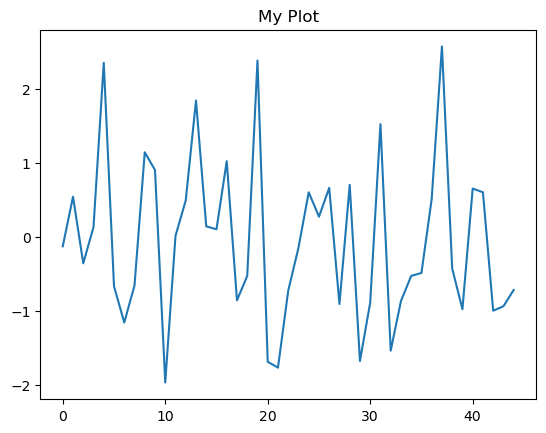

In [58]:
# Pandas has some handy builtin plotting methods, for when you need to quickly examine your data

df['January'].plot(title='My Plot')

<Axes: ylabel='Frequency'>

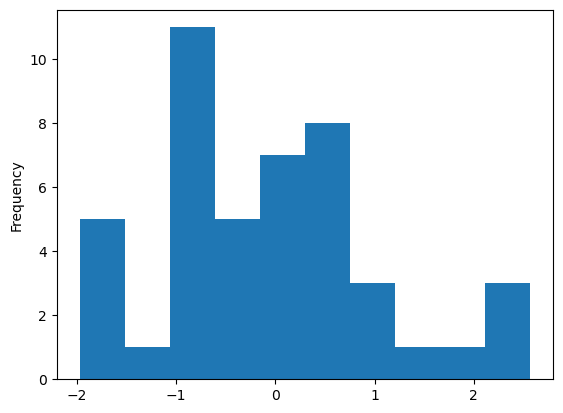

In [56]:
df['January'].plot(kind='hist')

<Axes: ylabel='Density'>

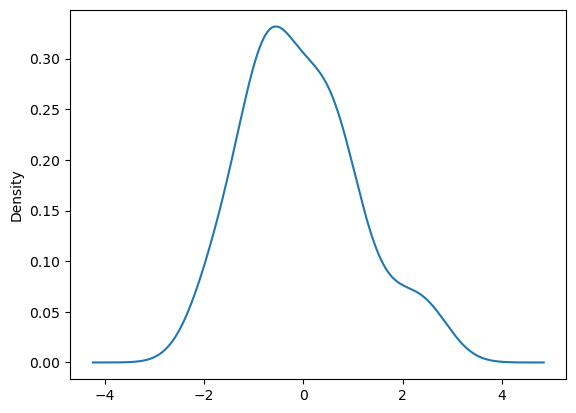

In [57]:
# Smoothed version using Kernel Desnity Estimation
df['January'].plot(kind='kde')

## Indexes

In [45]:
# We can also set Year as an Index. Note how the Year column data replaces the existing index.
df_indexed = df.set_index('Year').head()

In [46]:
# This allows us to access data in a Series in a different way
df_indexed['January'][1979]

-0.13

In [47]:
# And allows us to access rows from a Dataframe in a more intuitive way, using .loc

df_indexed.loc[1979]

January     -0.13
February    -0.22
March       -0.02
April        0.02
May         -0.25
June        -0.29
July        -0.47
August      -0.10
September    0.28
October      0.11
November     0.29
December     0.52
Name: 1979, dtype: float64

## Grouping data

In [48]:
# First we convert month information from columns to rows
df_long = df.melt(id_vars=['Year'], var_name='Month').drop('Year', axis=1)

In [49]:
# You can use groupby with built in functions to calculate metrics 
df_long.groupby('Month').mean()

,value
Month,
April,-0.092667
August,-0.024667
December,0.005556
February,-0.059333
January,-0.056444
July,-0.072222
June,-0.072667
March,-0.062000
May,-0.093556


In [50]:
# Or if you need to do several different summary statistics, agg() is more flexible
df_long.groupby('Month').agg(['min', 'max', 'mean'])

value                
            min   max      mean
Month                          
April     -1.18  1.20 -0.092667
August    -1.39  1.93 -0.024667
December  -1.96  2.66  0.005556
February  -1.67  2.26 -0.059333
January   -1.97  2.57 -0.056444
July      -1.74  1.56 -0.072222
June      -1.74  1.18 -0.072667
March     -1.21  1.62 -0.062000
May       -1.25  1.04 -0.093556
November  -2.05  2.72 -0.029111
October   -1.90  2.36 -0.022667
September -1.60  2.21  0.017556

## Creating Dataframes and Series

As well as loading from CSV, you can create your own dataframes from lists or dicts

In [80]:
my_new_df = pd.DataFrame({'Column_1': [1,2,3,4,5], 'Column_2': ['A', 'B', 'A', 'C', 'A'], 'Column_3': [0.1, 0.3, -1, 'NaN', 'NaN']}, dtype=['i', 's', 'f'])
my_new_df.head()

TypeError: Field elements must be 2- or 3-tuples, got ''i''

In [78]:
my_new_df[my_new_df['Column_3'].notna()]

,Column_1,Column_2,Column_3
0,1,A,0.1
1,2,B,0.3
2,3,A,-1
3,4,C,NaN
4,5,A,NaN


In [81]:
# Now lets create a Series

## Time Series Data

In [70]:
# Let's create a dummy dataframe
# Note the very helpful function pd.date_range, comes in handy, especially as the datetime module doesn't have an equivalent

import datetime
import numpy as np


n_data_points = 1000




# Dummy cosine data
dummy_data = np.cos(np.linspace(0,2*np.pi, n_data_points))

# Create list of dates 1 hour apart, starting at 1st Jan 2016, 00:00
dummy_date_range = pd.date_range(start=datetime.datetime(2016,1,1), freq='1h', periods=n_data_points)

time_series_df = pd.DataFrame({'Dates': dummy_date_range, 'Values': dummy_data})

In [71]:
time_series_df

,Dates,Values
0,2016-01-01 00:00:00,1.000000
1,2016-01-01 01:00:00,0.999980
2,2016-01-01 02:00:00,0.999921
3,2016-01-01 03:00:00,0.999822
4,2016-01-01 04:00:00,0.999684
...,...,...
995,2016-02-11 11:00:00,0.999684
996,2016-02-11 12:00:00,0.999822
997,2016-02-11 13:00:00,0.999921
998,2016-02-11 14:00:00,0.999980


Answers

In [45]:
# Load a time series dataframe
df = pd.read_csv('/Users/bobbyantonio/repos/iecdt_environmental_data_analysis/example_data/Oxford-Radcliffe-daily-data-to-Dec-2023.csv', header=0)

/var/folders/v4/9hznb5s5563242xcz40z0xl40000gn/T/ipykernel_10330/1512088011.py:2: DtypeWarning: Columns (6,7,14,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/bobbyantonio/repos/iecdt_environmental_data_analysis/example_data/Oxford-Radcliffe-daily-data-to-Dec-2023.csv', header=0)


In [56]:
df['Date'] = df['YYYY'].astype(str) + df['MM'].astype(str).str.zfill(2) + df['DD'].astype(str).str.zfill(2)
df = df.drop(['YYYY', 'MM', 'DD'], axis=1)
df['Date'] = pd.to_datetime(df['Date'])

In [58]:
df = df[['Date', 'Rainfall mm 1 dpl no traces', 'Daily Tmean °C']]

In [42]:
df['Precipitation'] = df['Precipitation']*3600

In [52]:
df[df['Rainfall mm 1 dpl no traces'].notna()]

,YYYY,MM,DD,Tmax °C,Tmin °C,Daily Tmean °C,Daily range degC,Grass min °C,Air frost 0/1,Ground frost 0/1,...,Rainfall mm 1 dpl no traces,Rain day (0.2 mm or more),Wet day (1.0 mm or more),Sunshine duration h,Nil sunshine,12 h sunshine,Unnamed: 21,Unnamed: 22,Updated to Dec 2023 data,Date
4383,1827,1,1,8.3,5.6,7.00,2.7,NaN,0,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18270101
4384,1827,1,2,2.2,0.0,1.10,2.2,NaN,0,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18270102
4385,1827,1,3,-2.2,-8.3,-5.30,6.1,NaN,1,NaN,...,9.7,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,18270103
4386,1827,1,4,-1.7,-7.8,-4.80,6.1,NaN,1,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18270104
4387,1827,1,5,0.0,-10.6,-5.30,10.6,NaN,1,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18270105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76331,2023,12,27,12.1,4.9,8.50,7.2,-0.5,0,1.0,...,4.4,1.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,20231227
76332,2023,12,28,12.1,9.1,10.60,3,6.1,0,0.0,...,6.1,1.0,1.0,3.2,0.0,0.0,NaN,NaN,NaN,20231228
76333,2023,12,29,9.0,7.8,8.40,1.2,4.9,0,0.0,...,3.1,1.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,20231229
76334,2023,12,30,11.6,4.6,8.10,7,1.7,0,0.0,...,20.3,1.0,1.0,0.6,0.0,0.0,NaN,NaN,NaN,20231230


## Joining data

## Exercises

Using observations from the Radcliffe Observatory

1) Load the dataframe in `example_data/Oxford-Radcliffe-daily-data-to-Dec-2023.csv`. Inspect the file to check what information needs to be loaded

2) Subselect only these columns: `Daily Tmean °C`, `Rainfall mm raw incl traces`,`YYYY`, `MM`, `DD`

3) Combine `YYYY`, `MM`, `DD` into a single date column called `Dates` with the format 'YYYY-MM-DD'. Convert this to a datetime column

4) How many dates have Null values for `Rainfall mm raw incl traces`?

5) Convert `Daily Tmean °C` to Kelvin; rename the column appropriately.

6) Calculate the average temperature for each year

7) Calculate the mean and standard deviation of the temperature by month temperature

8) Plot the distribution (using plot() with the kde type)

9) 

## Other functionality

In [ ]:
# Select rows and columns simultaneously
df.loc[df['Year'] > 2000, ['November', 'December']]

In [ ]:
# You can even use the ':' syntax to specify a range of columns
df.loc[df['Year'] > 2000, 'October':'December']

In [ ]:
# This also allows you to e.g. find the year with the smallest value
df.loc[df['']]

In [ ]:
# select based on the index of the row/ column instead

df.iloc[0:5,0:3]

In [22]:
# Use stack to get all monthly data in one column
df.loc[:,'January':'December'].stack().head()


0  January    -0.13
   February   -0.22
   March      -0.02
   April       0.02
   May        -0.25
dtype: float64

In [24]:
# Change month from a column to a variable
df.melt(id_vars=['Year'], var_name='Month')

,Year,Month,value
0,1979,January,-0.13
1,1980,January,0.54
2,1981,January,-0.36
3,1982,January,0.13
4,1983,January,2.35
...,...,...,...
535,2019,December,0.52
536,2020,December,-1.15
537,2021,December,-1.06
538,2022,December,-0.85
